### 문제정의
- 사내식당의 재고율을 낮추자!
- 메뉴에 따른 식당 이용률 확인 -> 메뉴의 퀄리티 상승
- 식수예측과 관련된 정보를 지속적으로 확인하고 개선하여 영양소 고려 및 직원선호도 파악 후 적절한 식단 구성

In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

# warings 제거
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 불러오기
data = pd.read_csv('data/Cafeteria.csv', encoding='cp949')
data

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


- 데이터 정보
| 컬럼명                    | 설명                                     |
|--------------------------|----------------------------------------|
| 일자                     | 데이터가 수집된 날짜                    |
| 요일                     | 해당 날짜의 요일                        |
| 본사정원수               | 본사에 근무하는 전체 직원 수             |
| 본사휴가자수             | 본사에 휴가 중인 직원 수                |
| 본사출장자수             | 본사에 출장 중인 직원 수                |
| 본사시간외근무명령서승인건수 | 본사에서 승인된 시간 외 근무 명령서 건수  |
| 현본사소속재택근무자수   | 본사 소속 중 재택 근무 중인 직원 수     |
| 조식메뉴                 | 해당 날짜의 조식 메뉴                   |
| 중식메뉴                 | 해당 날짜의 중식 메뉴                   |
| 석식메뉴                 | 해당 날짜의 석식 메뉴                   |
| 중식계                   | 해당 날짜에 중식을 이용한 직원 수       |
| 석식계                   | 해당 날짜에 석식을 이용한 직원 수       |

In [4]:
# 데이터 정보 확인
data.info()
# 일자, 요일, 메뉴 -> 문자열, 나머지는 숫자형태의 데이터인 것을 확인
# 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [5]:
# 일자 데이터는 '시간' 정보를 담고 있기 때문에 문자열이 아닌 날짜형태로 변경

In [6]:
import datetime
# 날짜와 시간 연산, 비교할 수 있도록 변경해주는 라이브러리
data['일자'] = pd.to_datetime(data['일자'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 113.1+ KB


In [8]:
# 날짜 기간 확인 -> 날짜로 변경했기 때문에 max와 min 사용 가능
data['일자'].max(), data['일자'].min()

(Timestamp('2021-01-26 00:00:00'), Timestamp('2016-02-01 00:00:00'))

In [9]:
# 요일별 식수 확인 (중식계, 석식계)
# groupby

df_day = data.groupby('요일')[['중식계','석식계']].mean()

In [10]:
# 그래프를 출력하기 위해서 요일별 인덱싱
df_day = df_day.loc[['월','화','수','목','금']]
df_day

,중식계,석식계
요일,,
월,1144.331950,538.933610
화,925.620833,520.129167
수,905.213389,363.615063
목,823.991803,480.401639
금,653.609959,404.979253


In [11]:
# 그래프 라이브러리
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'

<BarContainer object of 5 artists>

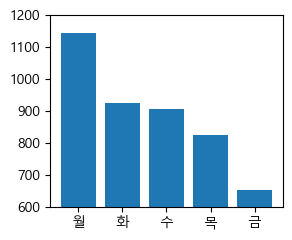

In [12]:
plt.figure(figsize= (3, 2.5))
plt.ylim(600, 1200)
# plt.bar(x축 / 요일, y축 / 중식계식수)
plt.bar(df_day.index, df_day['중식계'])

- 월요일에 중식계에 대한 식수가 가장 많음
- 금요일에는 중식계에 대한 식수가 가장 낮음
- 주초에는 식당이용률이 높고 금요일에는 외부식사 (휴가와 관련)

<BarContainer object of 5 artists>

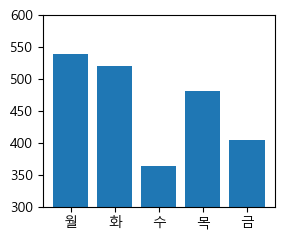

In [13]:
plt.figure(figsize= (3, 2.5))
plt.ylim(300, 600)
plt.bar(df_day.index, df_day['석식계'])

In [14]:
# 월별 평균 중식계, 석식계 데이터 확인
# month 새로운 컬럼 생성
data.head()
data['month'] = data['일자'].dt.month

In [15]:
data.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,month
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2


In [16]:
df_month = data.groupby('month')[['중식계', '석식계']].mean()
df_month

,중식계,석식계
month,,
1,934.247525,424.564356
2,989.623656,514.860215
3,953.607477,530.700935
4,883.621359,480.825243
5,869.787879,458.131313
6,863.311111,460.355556
7,848.736364,437.300000
8,854.785047,459.485981
9,907.148936,463.617021


<BarContainer object of 12 artists>

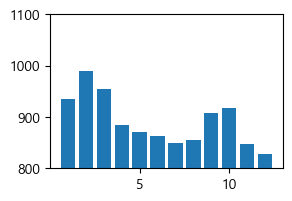

In [17]:
plt.figure(figsize=(3,2))
plt.ylim(800, 1100)
plt.bar(df_month.index, df_month['중식계'])

<BarContainer object of 12 artists>

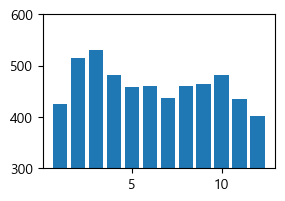

In [18]:
plt.figure(figsize=(3,2))
plt.ylim(300, 600)
plt.bar(df_month.index, df_month['석식계'])

In [19]:
# 메뉴데이터를 활용해보자!
# text 형태의 데이터임 -> 전처리
data['조식메뉴'][0]

'모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐어채무침  포기김치 (배추,고추가루:국내산) '

In [20]:
data['조식메뉴'][0].split(' ')
# 공백으로 나누어져 있는 메뉴를 분리 -> 2칸과 1칸으로 비균일하게 나누어져 있음을 확인
# 2칸 공백을 1칸 공백으로 변경

['모닝롤/찐빵',
 '',
 '우유/두유/주스',
 '계란후라이',
 '',
 '호두죽/쌀밥',
 '(쌀:국내산)',
 '된장찌개',
 '',
 '쥐어채무침',
 '',
 '포기김치',
 '(배추,고추가루:국내산)',
 '']

In [21]:
# 2칸 공백 -> 1칸 공백 변경 
data['조식메뉴'][0].replace('  ', ' ')

'모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐어채무침 포기김치 (배추,고추가루:국내산) '

In [22]:
# 2칸 공백 -> 1칸 공백 변경 작업을 모든 메뉴에 적용
data['조식메뉴'] = data['조식메뉴'].str.replace('  ', ' ')
data['중식메뉴'] = data['중식메뉴'].str.replace('  ', ' ')
data['석식메뉴'] = data['석식메뉴'].str.replace('  ', ' ')

In [23]:
# 1칸 공백을 기준으로 데이터 나눠주기
data['조식메뉴'][0].split(' ')

['모닝롤/찐빵',
 '우유/두유/주스',
 '계란후라이',
 '호두죽/쌀밥',
 '(쌀:국내산)',
 '된장찌개',
 '쥐어채무침',
 '포기김치',
 '(배추,고추가루:국내산)',
 '']

In [24]:
data['조식메뉴'] = data['조식메뉴'].str.split(' ')
data['중식메뉴'] = data['중식메뉴'].str.split(' ')
data['석식메뉴'] = data['석식메뉴'].str.split(' ')

In [25]:
data.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,month
0,2016-02-01,월,2601,50,150,238,0.0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, (쌀:국내산), 된장찌...","[쌀밥/잡곡밥, (쌀,현미흑미:국내산), 오징어찌개, 쇠불고기, (쇠고기:호주산),...","[쌀밥/잡곡밥, (쌀,현미흑미:국내산), 육개장, 자반고등어구이, 두부조림, 건파래...",1039.0,331.0,2
1,2016-02-02,화,2601,50,173,319,0.0,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, (쌀:국내산), 호...","[쌀밥/잡곡밥, (쌀,현미흑미:국내산), 김치찌개, 가자미튀김, 모둠소세지구이, 마...","[콩나물밥*양념장, (쌀,현미흑미:국내산), 어묵국, 유산슬, (쇠고기:호주산), ...",867.0,560.0,2
2,2016-02-03,수,2601,56,180,111,0.0,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, (쌀:국내산), ...","[카레덮밥, (쌀,현미흑미:국내산), 팽이장국, 치킨핑거, (닭고기:국내산), 쫄면...","[쌀밥/잡곡밥, (쌀,현미흑미:국내산), 청국장찌개, 황태양념구이, (황태:러시아산...",1017.0,573.0,2


#### 공백을 기준으로 나눈 데이터 중 TF-IDF 방식을 활용하여 main 메뉴 선정
- 공백을 기준으로 메뉴들을 나눴을 때 방문 혼잡도에 영향을 많이 미치는 메뉴는 메인메뉴
- 매일 나오는 메뉴가 아닌 어쩌다 한번 나오는 메뉴가 메인메뉴이기 때문에 TF-IDF 방식을 활용
- 추가로 메인메뉴를 선정하기 위한 불필요한 정보인 원산지 정보 제거하고 진행

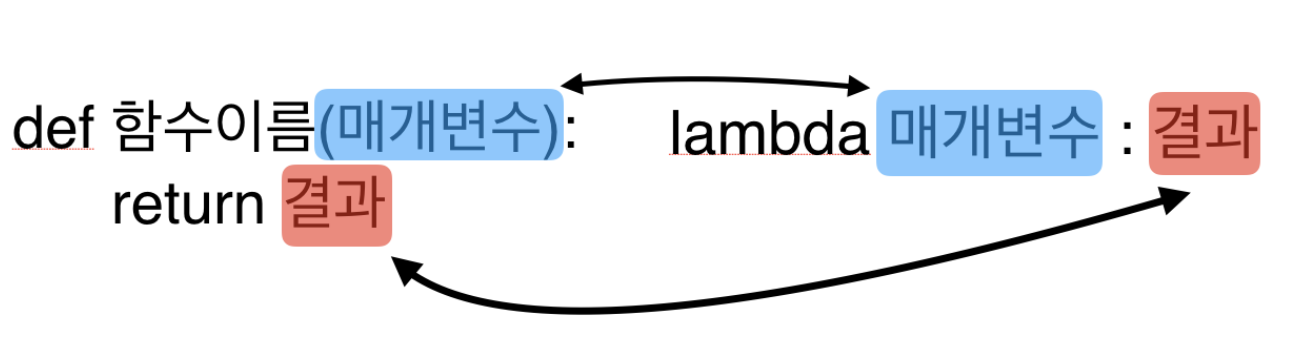

In [26]:
# 한줄로 간단하게 함수를 정의하여 적용 -> lambda
# lambda 매개변수 : 실행결과
(lambda x,y : x+y) (1, 2)

3

In [27]:
# 리스트 형태의 데이터를 문자열로 변경해주는 작업 진행 (TF - IDF 방식 활용을 위해)
# lambda x : ' '.join(x) -> x로 입력된 데이터들의 요소 하나하나를 문자열로 결합 (사이에 공백)
data['조식메뉴'] = data['조식메뉴'].apply(lambda x : ' '.join(x))

In [28]:
data['중식메뉴'] = data['중식메뉴'].apply(lambda x : ' '.join(x))
data['석식메뉴'] = data['석식메뉴'].apply(lambda x : ' '.join(x))

In [29]:
# 정규표현식 : 문자열 검색, 패턴 찾아주는데 사용
import re

# 불필요한 원산지 정보 제거하기!
# 제거함수 정의 -> 적용
def remove (text) :
    # 문자열에서 소괄호 안에 있는 텍스트는 제거
    return re.sub(r'\([^)]*\)', '', text)
# re.sub(찾고자하는 패턴, 바꾸고자하는 값, text)
# r'\([^)]*\)' : list 안에 닫는 괄호를 제외한(^) 모든 문자를 닫는 괄호가 나타나기 전까지 찾아주세요

In [30]:
# 데이터프레임에 적용하기 ~
data['조식메뉴_정제'] = data['조식메뉴'].apply(remove)
data['중식메뉴_정제'] = data['중식메뉴'].apply(remove)
data['석식메뉴_정제'] = data['석식메뉴'].apply(remove)

In [31]:
data['조식메뉴']

0       모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐어채무...
1       모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌개 ...
2       모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국 느...
3       모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국 멸...
4       모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방풍나물...
                              ...                        
1200    모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...
1201    모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...
1202    모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...
1203    모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...
1204    모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...
Name: 조식메뉴, Length: 1205, dtype: object

In [32]:
data['조식메뉴_정제']

0         모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥  된장찌개 쥐어채무침 포기김치  
1       모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥  호박젓국찌개 시래기조림 포...
2       모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥  콩나물국 느타리호박볶음 ...
3         모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥  근대국 멸치볶음 포기김치  
4          모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥  재첩국 방풍나물 포기김치  
                              ...                        
1200    모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...
1201    모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...
1202    모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...
1203    모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...
1204    모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...
Name: 조식메뉴_정제, Length: 1205, dtype: object

- TF-IDF를 통한 가중치 계산하여 상위 2개 메뉴 선정

In [33]:
# TF-IDF 도구 불러오기
# 텍스트데이터 벡터화도구이긴 하나 문자열의 빈도수에 기반한 중요도를 확인해 볼 수 있다!
# TF-IDF(Term Frequency-Inverse Document Frequency)
# 문서 내 단어의 빈도와 전체 문서에서의 희귀성을 반영한 가중치를 계산한 것
from sklearn.feature_extraction.text import TfidfVectorizer

# 객체생성
tfidf_vectorizer= TfidfVectorizer()

In [34]:
# 조식, 중식, 석식 메뉴별 TF-IDF 점수 변환
X = tfidf_vectorizer.fit_transform(data['중식메뉴_정제'])

In [35]:
# 변환한 점수를 확인하기 위하여 DataFrame으로 출력
tfidf_df = pd.DataFrame(X.toarray(),
            columns=tfidf_vectorizer.get_feature_names_out())

In [36]:
# DataFrame에서 전체 행 or 전체 열 출력
pd.set_option('display.max_columns',None)
pd.reset_option('display.max_columns',None)

In [37]:
data['중식메뉴_정제']

0               쌀밥/잡곡밥  오징어찌개 쇠불고기  계란찜 청포묵무침 요구르트 포기김치  
1           쌀밥/잡곡밥  김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이  
2               카레덮밥  팽이장국 치킨핑거  쫄면야채무침 견과류조림 요구르트 포기김치  
3               쌀밥/잡곡밥  쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트 포기김치  
4               쌀밥/잡곡밥  떡국 돈육씨앗강정  우엉잡채 청경채무침 요구르트 포기김치  
                              ...                        
1200    쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...
1201    쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...
1202    전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...
1203    쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...
1204    쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...
Name: 중식메뉴_정제, Length: 1205, dtype: object

In [38]:
tfidf_df

,d오리엔탈d,la갈비구이,가래떡구이,가래떡돼지갈비찜,가래떡츄러스,가자미무조림,가자미양념찜,가자미엿장구이,가자미엿장조림,가자미유린기,...,훈제오리구이,훈제오리냉채,훈제오리단호박볶음,훈제오리마늘볶음,훈제오리볶음,흑미밥,흑임자d,흑임자드레싱,흑임자연근샐러드,히레카츠
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.214849,0.0,0.0,0.0,0.0
1201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.192437,0.0,0.0,0.0,0.0


In [39]:
# 첫번째 행에서 (하루)의 점수가 가장 높은 데이터 1개 출력
top_n_idx = tfidf_df.iloc[0].argmax()
# 최고점수의 인덱스 번호 출력

In [40]:
# 메뉴이름(컬럼명)을 인덱싱
tfidf_df.columns[1150]

'오징어찌개'

In [41]:
# 위에서 진행한 최고점수의 메뉴를 추출하는 과정을 함수로 정의하여 한번에 실행
# 함수정의
def extract_main_menu (menu_series):
    # 객체생성
    tfidf_vectorizer = TfidfVectorizer()

    # 조식, 중식, 석식 메뉴별 TF-IDF 점수 변환
    X = tfidf_vectorizer.fit_transform(menu_series)

    # 변환한 점수를 확인하기 위하여 DataFrame 으로 출력
    tfidf_df = pd.DataFrame(X.toarray(),
                            columns=tfidf_vectorizer.get_feature_names_out())
    # 각 메뉴별 TF-IDF 점수가 높은 단어를 추출 -> 함수화
    def top_word (row):
        top_n_idx = row.argmax()
        return tfidf_df.columns[top_n_idx]

    # tf-idf_df 에 lambda 식을 적용하여 메인메뉴 추출
    main_dishes = tfidf_df.apply(lambda row: top_word(row), axis = 1)
    return main_dishes

In [42]:
data['조식메뉴_main'] = extract_main_menu(data['조식메뉴_정제'])
data['중식메뉴_main'] = extract_main_menu(data['중식메뉴_정제'])
data['석식메뉴_main'] = extract_main_menu(data['석식메뉴_정제'])

In [43]:
data[['조식메뉴_main','중식메뉴_main','석식메뉴_main']]

,조식메뉴_main,중식메뉴_main,석식메뉴_main
0,쥐어채무침,오징어찌개,건파래무침
1,단호박샌드,김치찌개,콩나물밥
2,느타리호박볶음,견과류조림,새송이버섯볶음
3,근대국,부추전,미니김밥
4,방풍나물,돈육씨앗강정,감자소세지볶음
...,...,...,...
1200,마늘종숙회,견과류마카로니범벅,맛살튀김
1201,생크림단팥빵,버섯숙회,비엔나채소볶음
1202,바지락살국,계란파국,수제맛쵸킹탕수육
1203,분홍소세지구이,양념김,생강채


In [44]:
data['석식메뉴_main'].value_counts()

석식메뉴_main
가래떡오븐구이    28
자기계발의날      7
자기개발의날      6
애호박나물       5
군만두         5
           ..
가자미양념조림     1
봄나물튀김       1
모둠버섯초무침     1
꼬들단무지       1
수제고기육전      1
Name: count, Length: 911, dtype: int64

<Axes: ylabel='석식메뉴_main'>

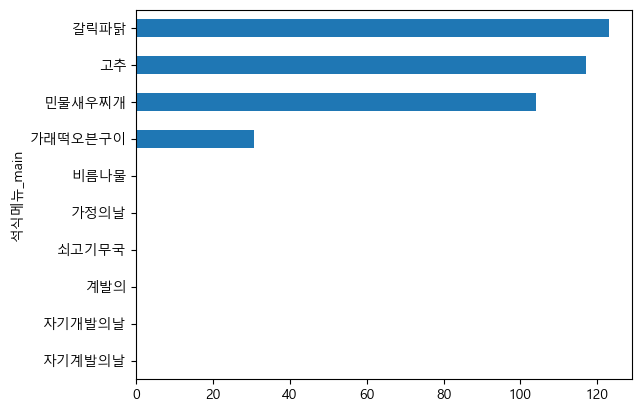

In [45]:
# main 메뉴에 따른 석식계 수치 확인 -> 시각화
df_dinner = data.groupby('석식메뉴_main')['석식계'].mean()
df_dinner_10 = df_dinner.sort_values(ascending=True).head(10)
df_dinner_10.plot(kind='barh')
# 석식메뉴에 따른 식수계 확인하여 메뉴의 구성을 변경
# 자기개발의 날, 자기계발의날

In [46]:
# 석식계가 0인 데이터를 확인 -> 데이터 확인 후 결측치 제거 여부 파악
# 불리언인덱싱 -> 조건에 맞는(True) 데이터들만 추출
# 전체데이터[조건]
data[data['석식계'] == 0]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,month,조식메뉴_정제,중식메뉴_정제,석식메뉴_정제,조식메뉴_main,중식메뉴_main,석식메뉴_main
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 김자...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 포기김치...,*,1109.0,0.0,11,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 고추장찌개 김자반 포기김치,나물비빔밥 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 포기김치,*,카스텔라,감자샐러드,가래떡오븐구이
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 느...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉절이 (...,*,767.0,0.0,12,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 북어계란국 느타리호박볶음 ...,콩나물밥 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉절이,*,북어계란국,군고구마,가래떡오븐구이
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 김...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김치:국내산),*,720.0,0.0,1,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 두부젓국찌개 김자반 포기김치,카레덮밥 맑은국 유린기 개성감자만두 오이사과무침 포기김치,*,두부젓국찌개,개성감자만두,가래떡오븐구이
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채무침...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 알타리김...,*,1065.0,0.0,2,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 꽃게탕 명엽채무침 포기김치,나물비빔밥 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 알타리김치,*,브라우니,탈탈소스,가래떡오븐구이
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침 포...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (김치:국...,*,953.0,0.0,3,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 콩나물국 김실파무침 포기김치,쌀밥/잡곡밥 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기,*,김실파무침,비엔나볶음,가래떡오븐구이
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조림 ...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김치:국내산),*,835.0,0.0,4,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 된장찌개 검정콩조림 포기김치,비빔밥 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기,*,검정콩조림,하와이안샐러드,가래떡오븐구이
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자반김...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치 (김치...,자기계발의날,910.0,0.0,5,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 두부젓국찌개 자반김 포기김치,열무보리비빔밥 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치,자기계발의날,자반김,오이지무침,자기계발의날
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고구마...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치:국내산),*자기계발의날*,745.0,0.0,6,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 쇠고기매운국 고구마순나물 포기김치,콩나물밥 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기,*자기계발의날*,쇠고기매운국,삼치구이,자기계발의날
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙주나...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0,7,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 민물새우찌개 숙주나물 포기김치,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치,가정의날,숙주나물,소세지오븐구이,가정의날
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나물 ...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임 열무...,*,663.0,0.0,9,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 대구찌개 깻순나물 포기김치,쌀밥/잡곡밥 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임 열무김치,*,깻순나물,두부구이,가래떡오븐구이


In [47]:
# 석식계가 0인 데이터 삭제 -> 석식계가 0이 아닌 데이터들만 남겨놓자!
# 석식계가 0이 아닌 데이터들만 추출
data = data[data['석식계'] != 0]

In [48]:
data.shape

(1162, 19)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 0 to 1204
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1162 non-null   datetime64[ns]
 1   요일              1162 non-null   object        
 2   본사정원수           1162 non-null   int64         
 3   본사휴가자수          1162 non-null   int64         
 4   본사출장자수          1162 non-null   int64         
 5   본사시간외근무명령서승인건수  1162 non-null   int64         
 6   현본사소속재택근무자수     1162 non-null   float64       
 7   조식메뉴            1162 non-null   object        
 8   중식메뉴            1162 non-null   object        
 9   석식메뉴            1162 non-null   object        
 10  중식계             1162 non-null   float64       
 11  석식계             1162 non-null   float64       
 12  month           1162 non-null   int32         
 13  조식메뉴_정제         1162 non-null   object        
 14  중식메뉴_정제         1162 non-null   object        
 15  석식메뉴_정제  

In [50]:
# 불필요한 컬럼 삭제
data.drop(columns=['일자','조식메뉴','중식메뉴','석식메뉴','조식메뉴_정제','중식메뉴_정제','석식메뉴_정제'],
         inplace=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   요일              1162 non-null   object 
 1   본사정원수           1162 non-null   int64  
 2   본사휴가자수          1162 non-null   int64  
 3   본사출장자수          1162 non-null   int64  
 4   본사시간외근무명령서승인건수  1162 non-null   int64  
 5   현본사소속재택근무자수     1162 non-null   float64
 6   중식계             1162 non-null   float64
 7   석식계             1162 non-null   float64
 8   month           1162 non-null   int32  
 9   조식메뉴_main       1162 non-null   object 
 10  중식메뉴_main       1162 non-null   object 
 11  석식메뉴_main       1162 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 113.5+ KB


- 인코딩
    - 원핫인코딩, 레이블인코딩, 빈도수인코딩(Frequency Encoding)
    - 원핫인코딩 : 값의 우선순위의 의미가 없을 때 사용 -> 0 or 1의 값으로 변경
    - 레이블인코딩: 값의 우선순의가 존재 -> 우선순위가 높은 데이터에 높은 숫자를 매칭
    - 빈도수인코딩: 데이터의 빈도수로 대체
    - 장점:범주형 데이터의 빈도를 반영함
    - 단점:빈도가 같을 때 구분이 어려울수있음

In [52]:
# 데이터 타입에 따른 데이터 분리
numeric_list = [] # 수치형 컬럼을 담을 list
categorical_list = [] # 범주형 컬럼을 담을 list
for i in data.columns:
    if data[i].dtypes == 'O':
        categorical_list.append(i)
    else :
        numeric_list.append(i)
print("categorical: ", categorical_list)
print("numeric:", numeric_list)

categorical:  ['요일', '조식메뉴_main', '중식메뉴_main', '석식메뉴_main']
numeric: ['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '중식계', '석식계', 'month']


### 데이터전처리
- 스케일링: 우리의 데이터를 표준화된 범위로 변경
    - 데이터 특성별로 데이터의 크기가 많이 다르게 되면 제대로 된 학습이 어려울 수 있음
    - 스케이링을 통해서 데이터특성의 범위(분포)를 비슷하게 변경

In [53]:
# 도구 불러오기
from sklearn.preprocessing import StandardScaler

# 객체생성
scaler = StandardScaler()

# 원본 데이터 보존을 위해 복사
df_scaled = data.copy()

# 적용
df_scaled[numeric_list] = scaler.fit_transform(data[numeric_list])

In [54]:
df_scaled

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,month,조식메뉴_main,중식메뉴_main,석식메뉴_main
0,월,-1.209700,-0.752302,-2.076931,-0.188500,-0.402953,0.699737,-1.356106,-1.309380,쥐어채무침,오징어찌개,건파래무침
1,화,-1.209700,-0.752302,-1.550244,0.142205,-0.402953,-0.116075,0.744171,-1.309380,단호박샌드,김치찌개,콩나물밥
2,수,-1.209700,-0.710817,-1.389948,-0.707013,-0.402953,0.595389,0.863401,-1.309380,느타리호박볶음,견과류조림,새송이버섯볶음
3,목,-1.209700,-0.378936,-0.473971,0.289185,-0.402953,0.410408,0.423168,-1.309380,근대국,부추전,미니김밥
4,금,-1.209700,0.824133,-1.367049,-1.021387,-0.402953,0.159024,-1.365277,-1.309380,방풍나물,돈육씨앗강정,감자소세지볶음
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,수,1.018904,-0.579447,-0.977759,-1.143870,3.115217,0.955864,-0.530669,-1.599743,마늘종숙회,견과류마카로니범벅,맛살튀김
1201,목,1.018904,-0.461906,-0.222077,0.726042,2.755302,-0.282083,-1.154332,-1.599743,생크림단팥빵,버섯숙회,비엔나채소볶음
1202,금,1.018904,0.665107,0.167213,-1.156118,2.323404,-1.482086,-2.401658,-1.599743,바지락살국,계란파국,수제맛쵸킹탕수육
1203,월,1.018904,-0.358193,-2.008233,1.354790,2.539353,1.202505,0.212224,-1.599743,분홍소세지구이,양념김,생강채


- 스케일링된 데이터를 인코딩

In [55]:
# 요일데이터는 원핫인코딩, 메뉴데이터 빈도수인코딩
df_scaled['조식메뉴_main'].value_counts()
# 메뉴데이터는 고유값들이 너무 많아서 원핫인코딩을 적용할 경우 차원이 크게 증가
# 다른 encoding 방법을 고려 -> 빈도수인코딩
# 비지도학습의 경우 군집화 -> 데이터의 유사한 특성을 가진 그룹
# 빈도수인코딩을 하여도 괜찮다고 판단

조식메뉴_main
김잔파무침       9
북어국         9
쑥갓두부무침      8
도라지나물       8
연두부탕        8
           ..
베이글         1
열무된장나물      1
땅콩크림빵       1
참치야채        1
애호박새우젓볶음    1
Name: count, Length: 570, dtype: int64

In [56]:
# 요일 컬럼 -> 원핫인코딩 #0,1로 인코딩하기 위해 int64로 변경
df_scaled = pd.get_dummies(df_scaled,columns=['요일'],dtype = 'int64')

In [57]:
# 요일 컬럼을 제외한 메뉴 컬럼을 빈도수 인코딩
categorical_list[1:]

['조식메뉴_main', '중식메뉴_main', '석식메뉴_main']

In [58]:
# 각 메뉴들의 빈도수를 세서 (value_counts)-> 딕셔너리로 변경
df_scaled['조식메뉴_main'].value_counts().to_dict()

{'김잔파무침': 9,
 '북어국': 9,
 '쑥갓두부무침': 8,
 '도라지나물': 8,
 '연두부탕': 8,
 '브로컬리들깨찜': 7,
 '대구찌개': 7,
 '두부쑥갓무침': 7,
 '쇠고기무국': 7,
 '꽈리고추찜': 7,
 '대구매운탕': 7,
 '느타리볶음': 7,
 '문어꽈리초조림': 7,
 '무생채': 6,
 '느타리호박볶음': 6,
 '조랭이떡국': 6,
 '열무나물': 6,
 '브로컬리초장': 6,
 '선지해장국': 6,
 '시래기국': 6,
 '마늘쫑볶음': 6,
 '재첩국': 6,
 '브로컬리죽': 6,
 '맑은만두육개장': 6,
 '미역국': 6,
 '땅콩조림': 6,
 '대구탕': 6,
 '어묵볶음': 6,
 '매운버섯국': 6,
 '핫케익': 6,
 '단배추나물': 5,
 '올챙이만두국': 5,
 '차돌박이찌개': 5,
 '동전쥐포무침': 5,
 '버섯매운탕': 5,
 '콩나물김치국': 5,
 '노각무침': 5,
 '동태찌개': 5,
 '삶은계란': 5,
 '감자조림': 5,
 '우거지해장국': 5,
 '참치야채죽': 5,
 '아욱국': 5,
 '고구마순나물': 5,
 '김치국': 5,
 '홍합탕': 5,
 '콩나물무침': 5,
 '북어해장국': 5,
 '김치두부국': 5,
 '팬케익': 5,
 '건새우아욱국': 5,
 '롤케익': 5,
 '연두부국': 5,
 '배추된장국': 5,
 '오이무침': 5,
 '된장찌개': 5,
 '두부젓국찌개': 5,
 '북어계란국': 4,
 '시금치핫케익': 4,
 '구운계란': 4,
 '호박죽': 4,
 '영양부추생채': 4,
 '콩자반': 4,
 '새송이볶음': 4,
 '시금치국': 4,
 '마늘쫑건새우볶음': 4,
 '깻순나물': 4,
 '볼어묵조림': 4,
 '오징어국': 4,
 '비름나물': 4,
 '미역나물': 4,
 '호두죽': 4,
 '새송이버섯볶음': 4,
 '진미채볶음': 4,
 '유채나물': 4,
 '볼어묵볶음': 4,
 '올갱이아욱국': 4,
 '두부양념조림': 4,
 '밤죽':

In [59]:
# 확인용
df_scaled['조식메뉴_main'].map(df_scaled['조식메뉴_main'].value_counts().to_dict())    

0       1
1       4
2       6
3       3
4       4
       ..
1200    1
1201    1
1202    1
1203    1
1204    1
Name: 조식메뉴_main, Length: 1162, dtype: int64

In [60]:
for column in categorical_list[1:]:
    freq_map = df_scaled[column].value_counts().to_dict()
    df_scaled[f"{column}_encoded"] = df_scaled[column].map(freq_map)

In [61]:
df_scaled.drop(columns=['조식메뉴_main','중식메뉴_main','석식메뉴_main'], inplace=True)

In [62]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 0 to 1204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   본사정원수              1162 non-null   float64
 1   본사휴가자수             1162 non-null   float64
 2   본사출장자수             1162 non-null   float64
 3   본사시간외근무명령서승인건수     1162 non-null   float64
 4   현본사소속재택근무자수        1162 non-null   float64
 5   중식계                1162 non-null   float64
 6   석식계                1162 non-null   float64
 7   month              1162 non-null   float64
 8   요일_금               1162 non-null   int64  
 9   요일_목               1162 non-null   int64  
 10  요일_수               1162 non-null   int64  
 11  요일_월               1162 non-null   int64  
 12  요일_화               1162 non-null   int64  
 13  조식메뉴_main_encoded  1162 non-null   int64  
 14  중식메뉴_main_encoded  1162 non-null   int64  
 15  석식메뉴_main_encoded  1162 non-null   int64  
dtypes: float64(8), int64(8)
memor

### K-means
- 비슷한 샘플들끼리 군집 형성
- 쉽고 간결함
- 거리기반 알고리즘 속성의 개수가 많거나 스케일링이 되지 않은 경우 정확도가 떨어질수 있음
- 몇개의 군집을 선택해야 하는지 정확히 알 수 없음

In [63]:
!pip install mglearn

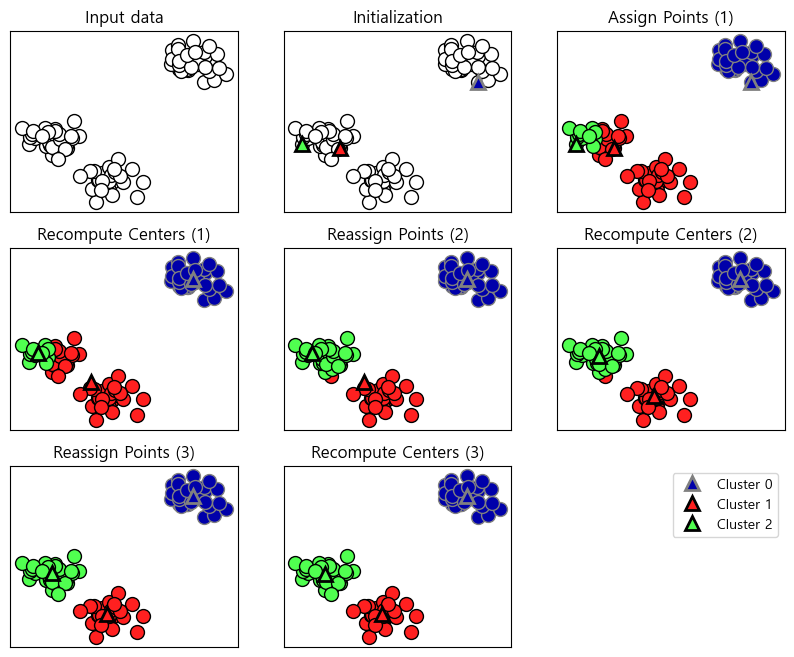

In [64]:
import mglearn

mglearn.plots.plot_kmeans_algorithm()

In [70]:
# 모델 불러오기
from sklearn.cluster import KMeans
# 모델 객체생성 → 하이퍼파라미터 조절
k_model = KMeans(n_clusters=3,  # 군집의 개수 설정
                n_init=10)  # 초기 중심점(centroid) 무작위로 선택하는 횟수 설정, 최적의 결과 선택
# 모델학습
k_model.fit(df_scaled)

KMeans(n_clusters=3, n_init=10)

In [72]:
# 학습결과 확인
num_clusters=k_model.n_clusters
# 1. 클러스터 개수 확인
print("클러스터 개수: ", num_clusters)

# 2. 각 데이터에 매칭된 클러스터 레이블 확인
print("클러스터레이블: ", k_model.labels_)

# 3. 각 클러스터들의 데이터 포인트 수
np.unique(k_model.labels_, return_counts=True)

클러스터 개수:  3
클러스터레이블:  [2 2 1 ... 0 0 0]


(array([0, 1, 2]), array([249, 393, 520], dtype=int64))

- 최적의 클러스터 수 결정하는 방법

In [ ]:
# 엘보우 기법
# 가장 완만해지는 k 수 찾기 -> 가장 효율적인 클러스터의 수를 의미
# 직관적이나, 엘보우 지점을 선택하는 과정에서 주관이 개입

# 클러스터의 개수 설정
ks = range(1,10) 

# ks(클러스터의 개수)에 따른 SSE 구하기

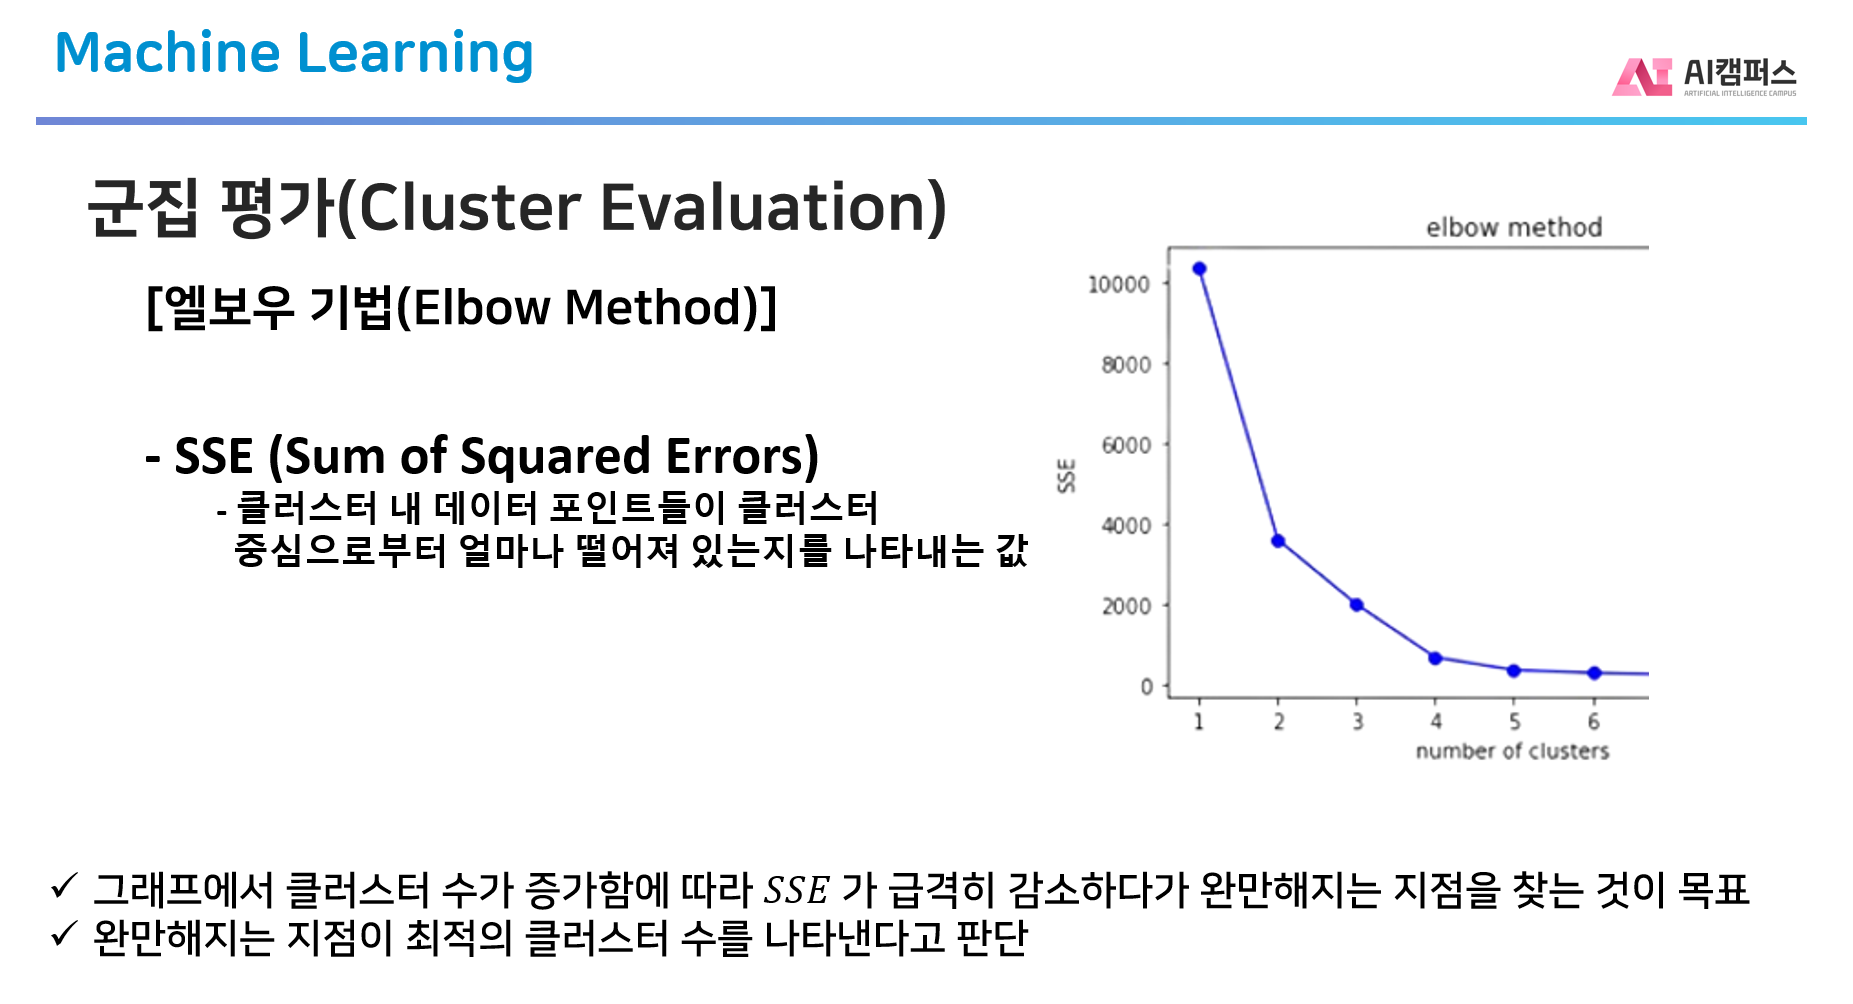